![Image](https://tennisnerds.files.wordpress.com/2013/05/djokovic-nadal-federer-murray-big-four.jpg)

# An Analysis of the Top Four Tennis Players' Strengths & Weaknesses
## **Data Bootcamp Project**
## Carrie Holland & Nicole Taylor

The purpose of this project is to look at data on the top four male players in the postmodern era: Andy Murray, Novak Djokovic, Roger Federer, and Rafael Nadal.  All of these players are considered some of the best in the world.  Assuming this, we want to determine their strengths and weaknesses on the court. How similar or different are these players from each other? 

We are using data found at https://github.com/serve-and-volley/atp-world-tour-tennis-data/tree/master/csv/active_players to study different measures of their success or failure (number of aces, number of double faults, length of match, number of break points won, ranking) along different determinants of success such as court surface type and environment type (indoor vs. outdoor). We hope to draw conclusions on each player's strengths and weaknesses in their games. What are each players' competitive advantages and how do they compare to each other?

### Import Python Packages

In [28]:
# import packages 
import pandas as pd                   # data management
import matplotlib.pyplot as plt       # graphics 
import datetime as dt                 # check today's date 
import seaborn as sns                 # import seaborn
import sys                            # check Python version 

# IPython command, puts plots in notebook 
%matplotlib inline


In [29]:
#convert WinLoss to integer
def map_win_loss(winloss):
    winchar = winloss[0]
    if winchar.lower() == 'w':
        return 1
    else:
        return 0


def clean_individual(data, name):
    # add player name
    data['Player'] = name
    # limit data range
    yearsIcareAbout = [2010, 2011, 2012]
    data = data[data.year.isin(yearsIcareAbout)]
    # drop empty data
    data = data.dropna()
    # rename columns
    mapping = {'player1 aces': 'Aces',
               'player1 double faults': 'Double Faults',
               'player1 break points won': 'Break Pts Won',
               'year': 'Year',
               'ranking': 'Opponent Rank',
               'surface': 'Indoor vs. Outdoor',
               'type': 'Tournament Type',
               'score': 'Win or Loss',
               'player1 1st serve points won': '1st Serves Won',
               'player1 1st serves total': '1st Serves Total',
               'player1 total return points won': 'Returns Won',
               'player1 total return points total': 'Returns Played',
               'player1 total points total': 'Points Played',
               'player1 total points won': 'Points Won',
               'player1 total service points total': 'Serves Played',
               'player1 total service points won': 'Serves Won',
               'player1 break points total': 'Break Pts Played',
               'type': 'Tournament Type',
               'year': 'Year'}
    data = data.rename(columns=mapping)
    # format win/loss
    data['WinLoss'] = data['Win or Loss'].apply(map_win_loss)
    data = data.drop('Win or Loss',1)
    # split indoor/outdoor column into two
    data['temp'] = data['Indoor vs. Outdoor'].str.rsplit(': ')
    data['Surface'] = data['temp'].apply(lambda x: x[1])               #lambda: simple function
    data['Indoor vs. Outdoor'] = data['temp'].apply(lambda x: x[0])
    data = data.drop('temp', axis=1)
    # calculate some new columns
    data['Aces %'] = data['Aces']/data['Serves Played']*100
    data['1st Serve Won %'] = data['1st Serves Won']/data['1st Serves Total']*100
    data['Break Pts Won %'] = data['Break Pts Won']/data['Break Pts Played']*100
    data['Serves Won %'] = data['Serves Won']/data['Serves Played']*100
    data['Returns Won %'] = data['Returns Won']/data['Returns Played']*100
    data['Points Won %'] = data['Points Won']/data['Points Played']*100
    # drop unecessary columns
    columns_to_drop = ['tournament', 
                       'start date', 
                       'draw', 
                       'atp points', 
                       'atp ranking', 
                       'opponent',
                       'tournament prize money', 
                       'stats link',
                       'tournament round',
                       'time',
                       'winner', 
                       'player1 name', 
                       'player1 nationality', 
                       'player1 1st serves in',
                       'player1 1st serve points total',
                       'player1 2nd serve points won', 
                       'player1 2nd serve points total',
                       'player1 break points converted won', 
                       'player1 break points converted total', 
                       'player1 return games played',  
                       'player2 name', 
                       'player2 nationality', 
                       'player2 aces',
                       'player2 double faults', 
                       'player2 1st serves in', 
                       'player2 1st serves total', 
                       'player2 1st serve points won', 
                       'player2 1st serve points total', 
                       'player2 2nd serve points won', 
                       'player2 2nd serve points total', 
                       'player2 service games played', 
                       'player2 1st serve return points won', 
                       'player2 1st serve return points total',
                       'player2 2nd serve return points won', 
                       'player2 2nd serve return points total', 
                       'player2 break points converted won',
                       'player2 break points total',
                       'player2 break points converted total',
                       'player2 return games played',
                       'player2 total service points won', 
                       'player2 total service points total',
                       'player2 total return points won', 
                       'player2 total return points total', 
                       'player2 total points won', 
                       'player2 total points total', 
                       'tournament.1', 
                       'round',
                       'player1 service games played', 
                       'player2 break points won', 
                       'player1 1st serve return points won', 
                       'player1 1st serve return points total', 
                       'player1 2nd serve return points won',
                       'player1 2nd serve return points total']
    data = data.drop(columns_to_drop, axis=1)
    #round calculations to two decimal points
    data = data.round(2) 
    return data

In [30]:
Murray = clean_individual(pd.read_csv("Andy-Murray.csv"), "Murray")
Djokovic = clean_individual(pd.read_csv("Novak-Djokovic.csv"), "Djokovic")
Nadal = clean_individual(pd.read_csv("Rafael-Nadal.csv"), "Nadal")
Federer = clean_individual(pd.read_csv("Roger-Federer.csv"), "Federer")

Tennis = pd.concat([Murray, Federer, Djokovic, Nadal], axis=0, keys=["Murray", "Federer", "Djokovic", "Nadal"])
#show original data
Tennis.head()

Year Tournament Type Indoor vs. Outdoor Opponent Rank  Aces  \
Murray 356  2010              WC             Indoor             4  10.0   
       357  2010              WC             Indoor             2   4.0   
       358  2010              WC             Indoor             7   4.0   
       359  2010              WC             Indoor             1  22.0   
       361  2010            1000             Indoor            25  18.0   

            Double Faults  1st Serves Total  1st Serves Won  Break Pts Won  \
Murray 356            2.0              59.0            24.0            1.0   
       357            1.0              62.0            16.0            5.0   
       358            3.0              46.0            15.0            3.0   
       359            6.0             114.0            50.0            4.0   
       361            4.0              75.0            33.0            2.0   

            Break Pts Played      ...       Points Played  Player  WinLoss  \
Murray 356               1.0      ...               108.0  Murray        1   
       357               8.0      ...               106.0  Murray        0   
       358               5.0      ...               100.0  Murray        1   
       359               5.0      ...               223.0  Murray        0   
       361               4.0      ...               145.0  Murray        1   

            Surface  Aces %  1st Serve Won % Break Pts Won %  Serves Won %  \
Murray 356     Hard   16.95            40.68           100.0         69.49   
       357     Hard    6.45            25.81            62.5         56.45   
       358     Hard    8.70            32.61            60.0         63.04   
       359     Hard   19.30            43.86            80.0         68.42   
       361     Hard   24.00            44.00            50.0         70.67   

           Returns Won %  Points Won %  
Murray 356         40.82         56.48  
       357         18.18         40.57  
       358         59.26         61.00  
       359         33.03         51.12  
       361         30.00         51.03  

[5 rows x 25 columns]

## Figures & Graphs

### Figure 1: Overall Tennis Stats

In [31]:
Figure1 = Tennis.groupby('Player').mean().round(2)
Figure1 = Figure1.drop(Figure1.columns[0:3], axis=1)
Figure1 = Figure1.drop(Figure1.columns[1:11], axis=1)
Figure1 = Figure1.drop("1st Serves Total", axis=1)
Figure1

,Aces %,1st Serve Won %,Break Pts Won %,Serves Won %,Returns Won %,Points Won %
Player,,,,,,
Djokovic,6.66,47.94,64.85,67.74,44.25,55.76
Federer,10.79,49.84,67.41,71.93,40.65,55.68
Murray,10.33,44.08,63.55,66.84,43.27,54.73
Nadal,4.85,50.32,63.64,69.70,43.58,55.99


Wow! There is so much to say right from the start.  What stands out is how consistent these players are with each other.  They win about 85% of their matches (Murray averages well below, at 77%, though he's climbed up since 2012, when these numbers were calculated).  They win almost an identical percentage of points as well as break points.  Their service games are strong as well.  Our main question was initially: how much do players at the top have in common with each other?

Right now, it seems like they have quite a lot.  That said, we can start to see some big differences in players' service games.  The percentage of aces per service game varies quite a bit! Nadal - traditionally known to be a rather weak server (comparatively speaking) - has just under five aces per game, while Federer and Murray have over double that at 10 per game.  We'll return to this issue of aces later on to understand what impact this can have on one's game.  (Aces are considered to be of a high importance to success in the game - it helps the player hold their service game while conserving energy that can then be used to break their opponent.  It's one of the reasons Serena Williams is so unstoppable; it's also why rather mediocre players like John Isner and Miloc Raonic have progressed as far as they have in their careers.  But I digress.)

Another issue to explore lies in players' service game: the nasty double fault.  A double fault leads not only to a player forfeiting a point to their opponent.  It can have a pernicious effect on a player's mental game, affecting their ability to win their service point.  (It also gives their opponent a freebie without the opponent having to expend much energy.)  What's interesting is that the double fault data aligns perfectly with players' reputations.  Murray and Djokovic are known to be more of a 'head case', while Nadal and Federer are commended for their ability to keep calm on the court.  

Another bit on this: Murray's biggest hinderance is not his skill but what is called the "mental game." Once Murray becomes upset on the court, it's difficult for him to bounce back.  We should expect to see more variance in Murray than with other players.

#### So far, we've seen some differences in players' service games.  But overall, it seems like they have more in common than they do apart.  To take a better look, let's move past the overall data and split up the above calculations by surface type.  

### Figure 2: Stats by Court Type

In [32]:
Figure2 = Tennis.groupby(['Player','Surface']).mean().round(2)
Figure2 = Figure2.drop(Figure2.columns[0:13], axis = 1)
Figure2

WinLoss  Aces %  1st Serve Won %  Break Pts Won %  \
Player   Surface                                                      
Djokovic Clay        0.83    4.53            47.10            60.67   
         Grass       0.86    9.37            52.14            74.12   
         Hard        0.86    7.01            47.66            65.07   
Federer  Clay        0.78    9.03            48.91            68.25   
         Grass       0.85   13.15            53.56            76.00   
         Hard        0.86   10.91            49.49            65.35   
Murray   Clay        0.71    7.60            42.89            63.49   
         Grass       0.84   14.71            47.93            67.06   
         Hard        0.78   10.29            43.69            62.95   
Nadal    Clay        0.96    3.49            51.08            68.68   
         Grass       0.79    7.56            52.34            55.44   
         Hard        0.79    5.16            49.40            62.43   

                  Serves Won %  Returns Won %  Points Won %  
Player   Surface                                             
Djokovic Clay            66.40          44.51         55.07  
         Grass           70.98          40.51         55.36  
         Hard            67.75          44.66         56.05  
Federer  Clay            70.06          39.94         54.55  
         Grass           73.48          39.88         56.03  
         Hard            72.21          40.98         55.95  
Murray   Clay            63.67          45.00         54.09  
         Grass           72.49          38.85         54.76  
         Hard            66.68          43.61         54.91  
Nadal    Clay            69.39          48.79         58.48  
         Grass           71.26          37.61         53.69  
         Hard            69.57          41.49         54.88

That's a lot of numbers.  It's tough to really grab anything from the above stats, though they're nice to have.  Let's break down some of the above stats to get a better since of players' performance by court type.

### Graph 1: Percent of Matches Won by Surface Type

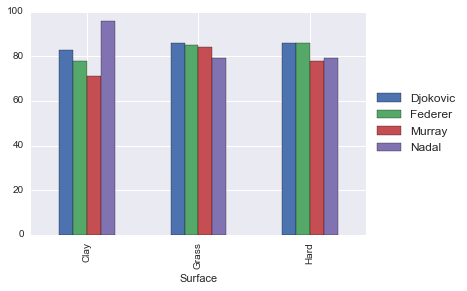

In [33]:
grouped = Tennis.groupby(['Player', 'Surface']).mean()
grouped['WinPct'] = 100 * grouped['WinLoss'].round(2)
grouped = grouped.reset_index()
plot = grouped[['Player', "Surface", "WinPct"]]
plt = plot.pivot(index='Surface', columns='Player', values='WinPct').plot.bar()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize='large');

Much better! There are three main insights from this chart:

1. Nadal clearly has the best performance on Clay, far outperforming other players.  He doesn't just outperform them; he's nearly impossible to beat.  He wins an astounding 96% of his matches on clay.  **96%!!** That's a statistic that one doesn't come across too often in tennis.  No wonder Nadal is called "The King of Clay." (Nadal grew up practicing on Clay.)

2. While Nadal is the king of clay, he has come catching up to do on the other two surfaces.  This is especially important for Hard Court, which accounts for the majority of matches players use in games.

3. While Murray struggles on Hard and Clay, what's interesting is that Djokovic and Federer have nearly identical performances on all three surfaces (Federer struggles a bit in Clay, though this difference wouldn't be statistically significant.)  Federer and Djokovic are considered the top two players - and we can see why. They're consistently strong no matter the surface.  For tennis fans (if you couldn't tell, I'm one of those), this also means that a Federer vs. Djokovic match is much more exciting - you never have a clear idea who is going to win!

### Graph 2: Points Won by Court Surface Type

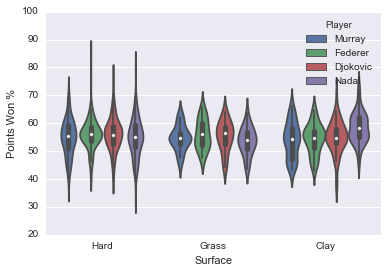

In [34]:
Plot1 = Tennis.reset_index().drop('level_0',axis=1)
sns.violinplot(x="Surface", y="Points Won %", hue= "Player", data= Tennis)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

We initially plotted this to understand if players' performance differs not just in overall outcome but in the percentage of overall points won.  (You can lose a match but it still be a really tight match - this would help show that.) What we found instead was that rather than this plot telling us something about the players themselves, it actually told us more about the court surfaces.  What stands out here is that compared to their experiences on Grass and Clay, players have a lot more variation when they play on Hard Court compared to other surfaces.

As we'll continue to see, the most variation can be found in Murray's game across surfaces; the least can be found in Federer's (though he seems unstable on Clay).  This is what Federer is known for - his incredible consistency.

But in the case of the inconsistency in hard core, this is what makes tennis so exciting! It's great to see players get broken and surprise upsets.  And it reminds us that even the top players have their bad matches - especially on Hard Court, apparently.  It's interesting that players are less consistent on Hard Court than they are on Grass and Clay.  I would have considered it the other way around, given that grass and clay are less, well, hard, surfaces.  They're mallable as the game progresses: just take a look at the baseline from the beginning of Wimbledon to the end of the tournament. But, I digress.  

#### We see a lot of variation in points won per game on a certain type of surface.  Murray has more variation in his game, but overall, the players are pretty consistent with each other.

Where else do we see a variation in points won per game? 


### Graph 3: Points Won on Indoor vs. Outdoor Courts

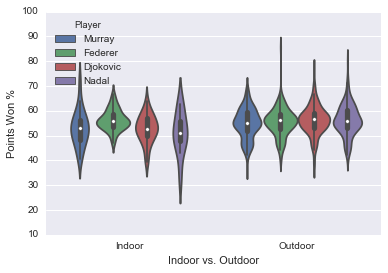

In [36]:
fig3 = sns.violinplot(x="Indoor vs. Outdoor", y="Points Won %", hue= "Player", data= Tennis)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);

Any analyst will say that court surface isn't the only environment that matters.  Indoor vs Outdoor can have have a big impact as well.  Indoor's advantages are that it removes external factors like wind (a problem that cannot be overstated in a game of carefully calculated shots), sun (which can get in players' eyes) and rain.  

It's not surprising that there's less variation on Indoor Courts than Outdoor Courts.  What's interesting is that there is pretty substantial variation within Indoor matches for both Murray and Nadal - even more so for Murray than on Outdoor Courts! It would be great to do some more research into this, but for now, we'll just say: environment matters.  Outdoor matches are less predictable overall.

### Graph 4: How Important are Aces to Each Player's Game?

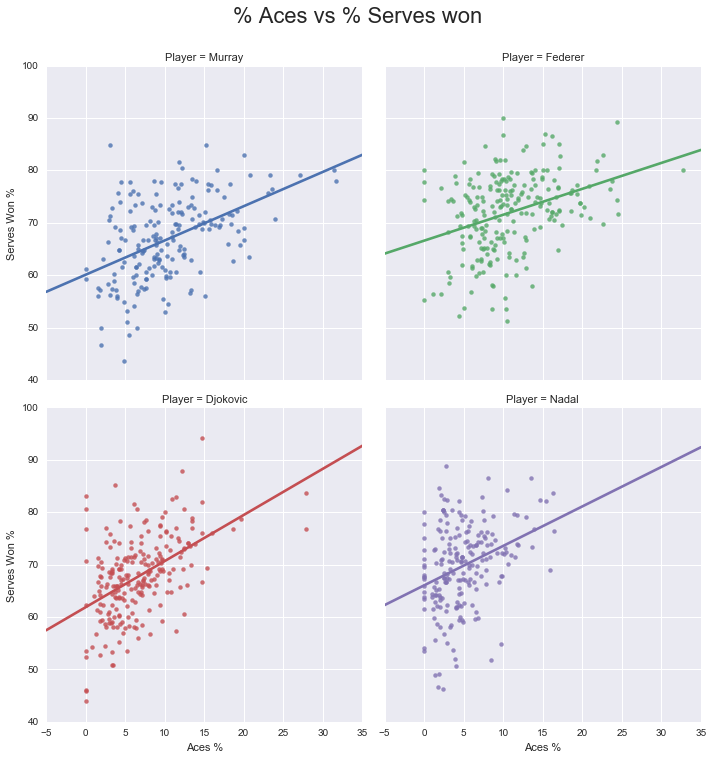

In [37]:
fg4 = sns.lmplot(x="Aces %", y="Serves Won %", data= Tennis, col="Player", hue="Player",
           col_wrap=2, ci=None)
fg4.fig.suptitle("% Aces vs % Serves won", fontsize=22, x=0.5, y=1.05);

Interesting.  So at the beginning table, when we saw the vast differences in aces %, we were at first impressed.  Murray and Federer have really nailed down Aces! But when we zoom out - looking at overall % of points won versus % of Aces made in a match- we see it doesn't really matter.  It does seem like there's some correlation - after all, an Ace increases your points per service game.  Again, it seems to be player specific.  Murray's all over the place - he's too inconsistent for his aces to have an impact on his service game.  Federer, who leads in aces, does not have as strong as a correlation as one would have hoped.

In this case, it's a good sign that aces don't predict a service game win.  It means that these are versatile players who have other tools to win a service game other than an ace.  Would make sense, since these are top-ranked players! 

### Graph 5: How Does the Opponent's Rank Affect a Player's Percentage of Points Won?

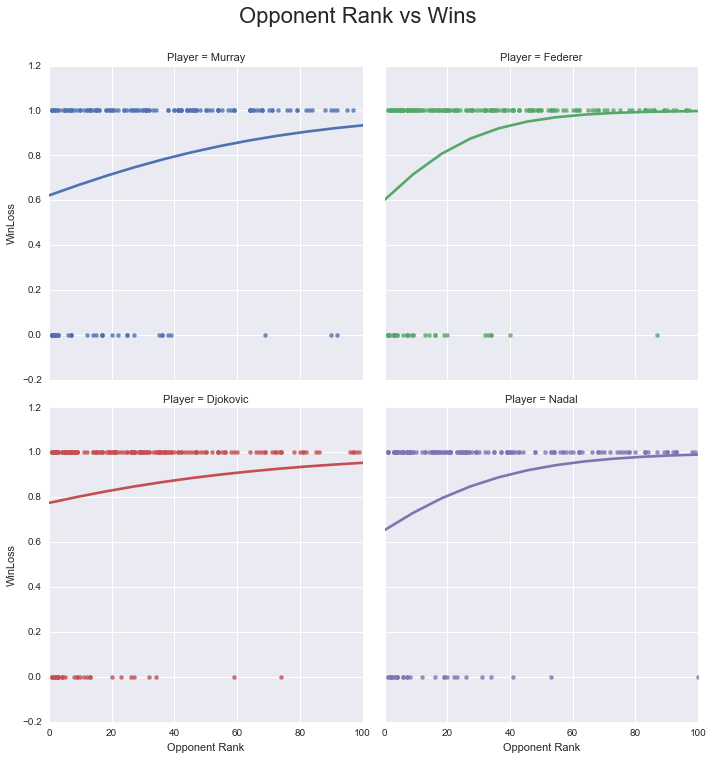

In [49]:
Tennis['Opponent Rank'] = Tennis['Opponent Rank'].astype(int)
fg2 = sns.lmplot(x="Opponent Rank", y="WinLoss", data=Tennis, logistic=True,
                 col="Player", hue="Player", col_wrap=2, ci=None)

for ax in fg2.axes:
    ax.set_xlim(0, 100)
    
fg2.fig.suptitle("Opponent Rank vs Wins", fontsize=22, x=0.5, y=1.05)
fg2.fig.tight_layout()

1. **Federer's consistency.**  We have noticed throughout that Federer is one of the most consistent players.  And we see it here: no matter his competition, surface, or environment (indoor vs. outdoor), he has one of the most consistent performances in the game. (It's consistently the best - he's considered perhaps the greatest all-time men's tennis player by some.) 

2. **Nadal's performance cap.** Nadal **is** a great player, but not as great as many give him credit for.  We intentionally limited the data to years 2010-2012 because Nadal suffered a series of injuries from 2012-2015 that hindered his performance. But this data suggests something that commentators have quietly said throughout those injury years: Nadal is a fantastic clay player, but overall he is not that strong.  He's inconsistent in surfaces outside of clay, and his win% shows this.  In some ways, other players (like Japan's Nishikori) may deserve Nadal's spot in the "fantastic four" men of tennis rather than Nadal.

3. **Murray and Djokovic's inconsistency.** Compared to Federer, Murray and Djokovic have much more distributed stats.  They lose more often against better-ranked players, and don't even win as often against lower-ranked players, either.  This would suggest that they are weaker players. Overall, at this point, perhaps they are.  The theory about these two is that they're incredibly strong players, but lose the mental game far more often than the physical game.  Indeed, in later years, these two clean up their mental game and begin to trade off the top rank.  Unsurprisingly, Djokovic does this better than Murray.

### _So what have we seen overall?_

We have four enormously talented players that have a lot in common.  But it seems like they've taken different routes to the top.  

* Nadal focused on a competitive advantage in clay.  His serve is pretty weak, but by dominating one surface, he is hanging on to the top 4 status.

* Federer is as clean as they come.  He's good (but not the best) at his service game and serving aces, good (but not the best) at returning, good at breaking opponents, and good on all courts.  He's more than good - he's a legend.  But the point is, Federer is clean no matter what environment he's put in.  Same goes for his mental game.  It makes for a remarkably resilient player and speaks to his strength after being on the pro circuit for so many years.

* Djokovic and Murray have incredible potential to be seen.  As hinted at earlier, their potential _is_ seen in later years.  At this time in their careers, they were inconsistent - and we see them tighten up the variation in hard court performance, break points converted, double faults, among other performance metrics later on.  

The data shown above is just a sample of what could be analyzed.  Retired tennis players build second careers off of tennis analysis.  But, what we've seen is a snapshot to give us a small insight into routes to the top - and we have learned that there can be variations to get there.